In [369]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 5)

In [381]:
df = pd.read_csv('PierceCricketData.csv')
df.head()

,Chirps,Temp
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [382]:
#get training data

trainX, trainY = (df['Chirps'].values, df['Temp'].values)

print('X:', trainX)
print('Y:',trainY)

X: [ 20.   16.   19.8  18.4  17.1  15.5  14.7  17.1  15.4  16.2  15.   17.2
  16.   17.   14.1]
Y: [ 88.6  71.6  93.3  84.3  80.6  75.2  69.7  82.   69.4  83.3  78.6  82.6
  80.6  83.5  76.3]


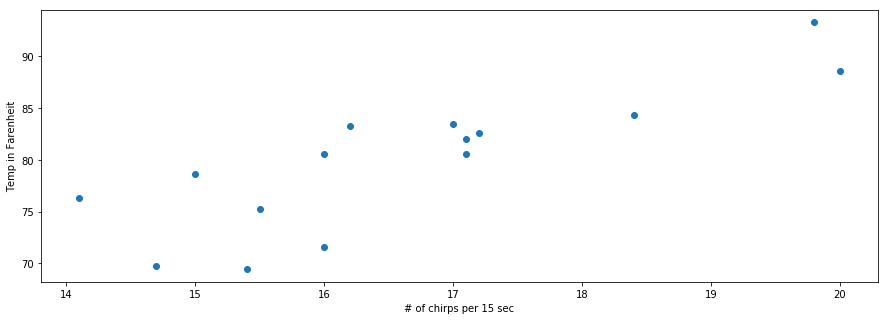

In [383]:
plt.xlabel("# of chirps per 15 sec")
plt.ylabel("Temp in Farenheit")
plt.plot(trainX, trainY, 'o')

In [373]:
#Create placeholders

X, Y = tf.placeholder(tf.float32), tf.placeholder(tf.float32)
W, b = tf.Variable(np.random.randn()), tf.Variable(np.random.randn())

In [374]:
#Activation function

Ypred = tf.add(tf.multiply(X, W), b)

( 20.0 , 14.759 )
( 16.0 , 11.4942 )
( 19.8 , 14.5958 )
( 18.4 , 13.4531 )
( 17.1 , 12.392 )
( 15.5 , 11.0861 )
( 14.7 , 10.4331 )
( 17.1 , 12.392 )
( 15.4 , 11.0044 )
( 16.2 , 11.6574 )
( 15.0 , 10.6779 )
( 17.2 , 12.4736 )
( 16.0 , 11.4942 )
( 17.0 , 12.3104 )
( 14.1 , 9.94335 )


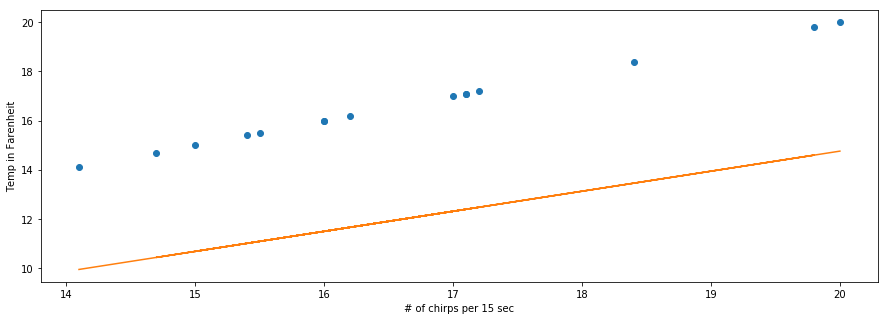

In [391]:
#initial linear model

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    pred = session.run(Ypred, feed_dict = {X:trainX})
    for (x, y) in zip(trainX, pred):
        print('(',x, ',', y, ')')
    plt.xlabel("# of chirps per 15 sec")
    plt.ylabel("Temp in Farenheit")
    plt.plot(trainX, trainX, "o")
    plt.plot(trainX, pred)

In [376]:
#training cycles / epochs, learning rate, display step size

training_cycles = 1000
learning_rate = 0.001
step_size = 50

# loss function = mean squared difference error 
loss = tf.reduce_mean(tf.squared_difference(Ypred, Y))

#train with gradient descent optimizer for minimizing loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

Step: 0000 W= 3.09069 b= -1.42943 loss= 912.367431641
Step: 0050 W= 4.86955 b= -1.29618 loss= 20.116130829
Step: 0100 W= 4.86793 b= -1.26893 loss= 20.101243973
Step: 0150 W= 4.86631 b= -1.24172 loss= 20.086362839
Step: 0200 W= 4.86469 b= -1.21452 loss= 20.071529388
Step: 0250 W= 4.86308 b= -1.18736 loss= 20.056722641
Step: 0300 W= 4.86146 b= -1.16022 loss= 20.041940689
Step: 0350 W= 4.85985 b= -1.13311 loss= 20.027187347
Step: 0400 W= 4.85824 b= -1.10603 loss= 20.012462616
Step: 0450 W= 4.85663 b= -1.07897 loss= 19.997770309
Step: 0500 W= 4.85502 b= -1.05194 loss= 19.983106613
Step: 0550 W= 4.85341 b= -1.02494 loss= 19.968477249
Step: 0600 W= 4.8518 b= -0.997965 loss= 19.953866959
Step: 0650 W= 4.8502 b= -0.971016 loss= 19.939287186
Step: 0700 W= 4.8486 b= -0.944094 loss= 19.924739838
Step: 0750 W= 4.847 b= -0.9172 loss= 19.910215378
Step: 0800 W= 4.8454 b= -0.890332 loss= 19.895732880
Step: 0850 W= 4.8438 b= -0.863491 loss= 19.881275177
Step: 0900 W= 4.8422 b= -0.836677 loss= 19.86684

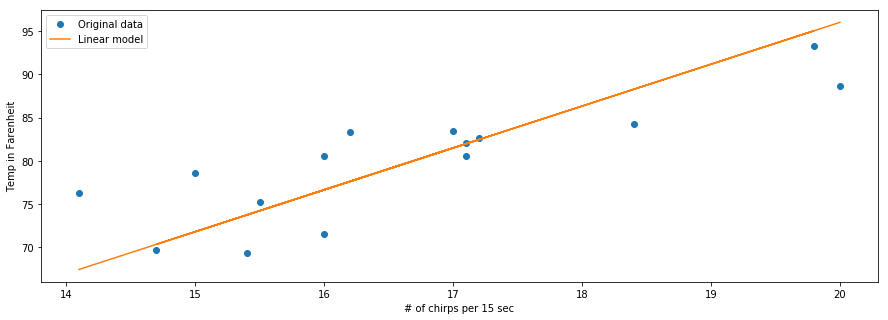

In [379]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    cost = []
    for step in range(training_cycles):
        sess.run(optimizer, feed_dict={X: trainX, Y: trainY})
        if step % step_size == 0:
            losses = sess.run(loss, feed_dict={X: trainX, Y:trainY})
            cost.append(losses)
            print ("Step:", '%04d' % step, "W=", sess.run(W), "b=", sess.run(b), "loss=", "{:.9f}".format(losses))
                
    print ("\nOptimization done!")
    print("Your linear model is:" )
    training_cost = sess.run(loss, feed_dict={X: trainX, Y: trainY})
    print ( "W=", sess.run(W), "b=", sess.run(b), "loss=", training_cost, '\n')

    #plot display
    
    plt.xlabel("# of chirps per 15 sec")
    plt.ylabel("Temp in Farenheit")
    plt.plot(trainX, trainY, 'o', label='Original data')
    plt.plot(trainX, sess.run(W) * trainX + sess.run(b), label='Linear model')
    plt.legend()

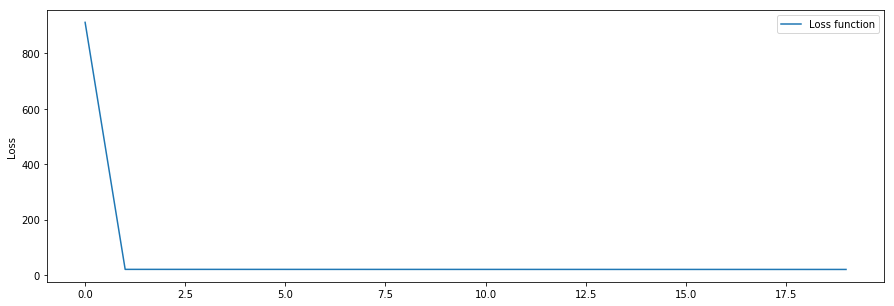

In [380]:
plt.ylabel("Loss")
plt.plot(cost, label = 'Loss function')
plt.legend()